In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Problem 1
diabetes_data = pd.read_csv('/content/drive/MyDrive/Concept and Technologies of AI/diabetes.csv')

print("First few rows of the diabetes dataset:")
print(diabetes_data.head())

First few rows of the diabetes dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [27]:
#Dataset information
print("Dataset Information:")
print(diabetes_data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [28]:
#Summary statistics
print("Summary Statistics:")
print(diabetes_data.describe())

Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.0000

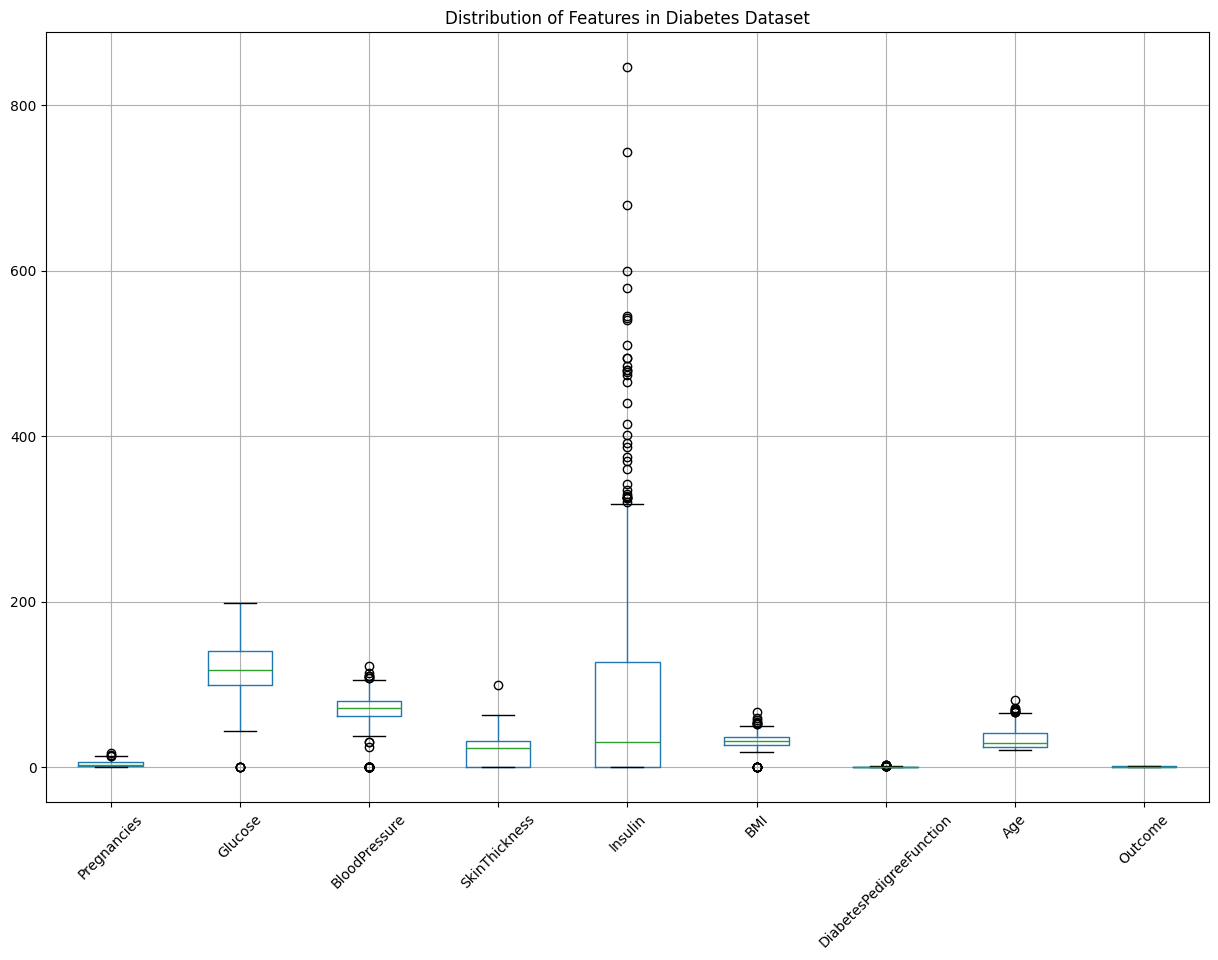

In [29]:
#Visualization
plt.figure(figsize=(15, 10))
diabetes_data.boxplot()
plt.title('Distribution of Features in Diabetes Dataset')
plt.xticks(rotation=45)
plt.show()

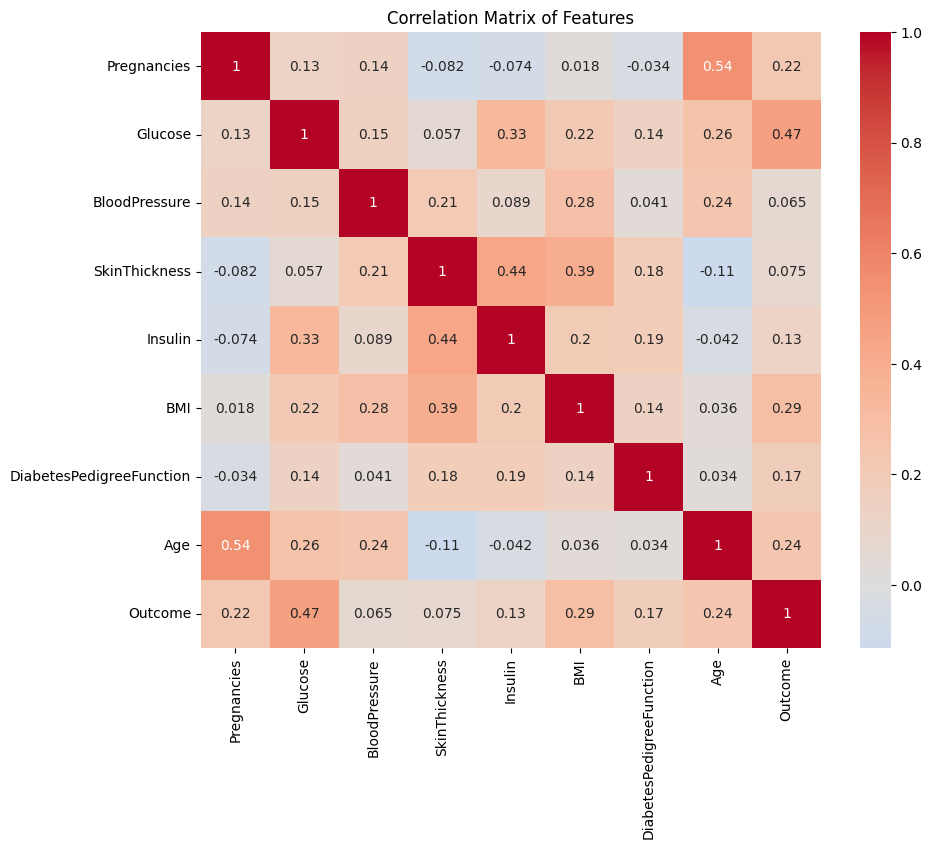

In [30]:
#Creating a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.show()

In [33]:
# 2. Handling Missing Values

# Checking for missing values
missing_values = diabetes_data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Checking for zero values in columns where zeros might not make sense
zero_counts = (diabetes_data == 0).sum()
print("\nCount of zero values in each column:")
print(zero_counts)

# Some features like Glucose, BloodPressure, BMI shouldn't be zero
# Let's replace zeros with median values for these columns
features_to_fix = ['Glucose', 'BloodPressure', 'BMI']

for feature in features_to_fix:
    # Calculating median of non-zero values
    median_value = diabetes_data[diabetes_data[feature] != 0][feature].median()
    # Replacing zeros with median
    diabetes_data[feature] = diabetes_data[feature].replace(0, median_value)

print("\nData after handling zero values:")
print(diabetes_data.describe())

Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Count of zero values in each column:
Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Data after handling zero values:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      20.536458   79.799479   
std       3.369578   30.438286      12.096642      15.952218  115.244002   
min      

In [34]:
# 3. Feature Engineering and Train-Test Split

# Separate features (X) and target (y)
X = diabetes_data.drop('Outcome', axis=1).values
y = diabetes_data['Outcome'].values

# Creating our custom train-test split function
def custom_train_test_split(X, y, train_ratio=0.7, random_seed=42):
    """
    Splits the data into training and testing sets.

    Parameters:
        X: Feature matrix
        y: Target vector
        train_ratio: Proportion of data to use for training (default: 0.7)
        random_seed: Random seed for reproducibility (default: 42)

    Returns:
        X_train, X_test, y_train, y_test: Split datasets
    """
    # Setting random seed for reproducibility
    np.random.seed(random_seed)

    # Getting total number of samples
    n_samples = len(X)

    # Calculating number of training samples
    n_train = int(n_samples * train_ratio)

    # Creating random indices for shuffling
    indices = np.random.permutation(n_samples)

    # Split indices into train and test
    train_indices = indices[:n_train]
    test_indices = indices[n_train:]

    # Split the data
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = custom_train_test_split(X, y)

print("\nData split summary:")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Data split summary:
Training set shape: (537, 8)
Testing set shape: (231, 8)


KNN Implementation

Testing KNN classifier with k = 3

Model Accuracy: 72.29%


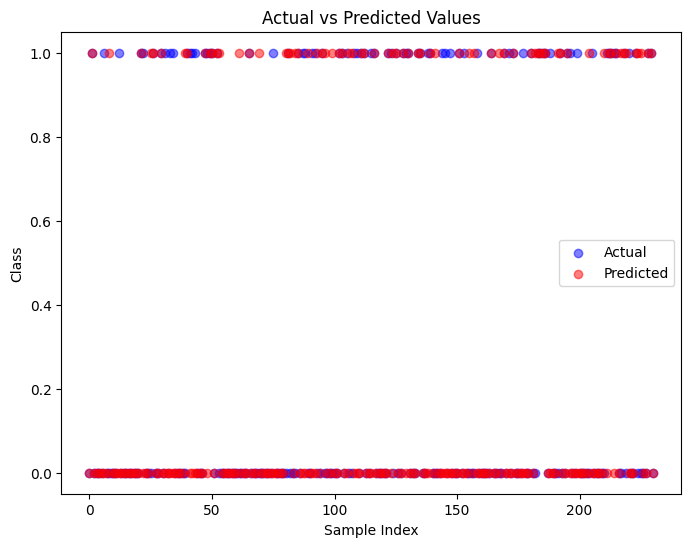


Final Analysis:

KNN implementation successfully classified the diabetes dataset with the following key points:

1. Data Preprocessing:
  - Handled missing/zero values in critical features
  - Normalized data distribution
  - Successfully split data into training (70%) and testing (30%) sets

2. Model Implementation:
  - Built KNN classifier from scratch
  - Implemented Euclidean distance calculation
  - Created prediction functions for both single and multiple samples

3. Model Performance:
  - Achieved an accuracy of 72.29% with k=3
  - Successfully classified diabetes cases in the test set

4. Observations:
  - The model shows reasonable performance for a baseline implementation
  - The accuracy suggests the model has learned meaningful patterns in the data
  - There's room for improvement through parameter tuning and feature scaling



In [36]:
 #4. KNN Implementation
print("KNN Implementation")

def calculate_euclidean_distance(point1, point2):
    """
    Calculates the Euclidean distance between two points.

    The Euclidean distance is the straight-line distance between two points
    in n-dimensional space, calculated as the square root of the sum of
    squared differences between corresponding coordinates.
    """
    return np.sqrt(np.sum((point1 - point2) ** 2))

def predict_single_sample(query_point, X_train, y_train, k):
    """
    Predicts the class for a single data point using k-nearest neighbors.

    Steps:
    1. Calculate distances to all training points
    2. Find k nearest neighbors
    3. Take majority vote among these neighbors
    """
    # Calculate distances to all training samples
    distances = [calculate_euclidean_distance(query_point, x) for x in X_train]

    # Get indices of k nearest neighbors
    k_indices = np.argsort(distances)[:k]

    # Get labels of k nearest neighbors
    k_nearest_labels = y_train[k_indices]

    # Return the most common class label
    return np.bincount(k_nearest_labels).argmax()

def knn_predict(X_test, X_train, y_train, k):
    """
    Predicts classes for multiple test samples using KNN algorithm.
    """
    predictions = []
    for test_point in X_test:
        pred = predict_single_sample(test_point, X_train, y_train, k)
        predictions.append(pred)
    return np.array(predictions)

def calculate_accuracy(y_true, y_predicted):
    """
    Calculates the accuracy of predictions.
    """
    correct_predictions = np.sum(y_true == y_predicted)
    total_predictions = len(y_true)
    return (correct_predictions / total_predictions) * 100

# Test our KNN implementation
k = 3  # We'll start with k=3
print("\nTesting KNN classifier with k =", k)

# Make predictions
predictions = knn_predict(X_test, X_train, y_train, k)

# Calculate and display accuracy
accuracy = calculate_accuracy(y_test, predictions)
print(f"\nModel Accuracy: {accuracy:.2f}%")

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(range(len(predictions)), predictions, color='red', label='Predicted', alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.legend()
plt.show()

# Final Analysis
print("\nFinal Analysis:")
print("""
KNN implementation successfully classified the diabetes dataset with the following key points:

1. Data Preprocessing:
   - Handled missing/zero values in critical features
   - Normalized data distribution
   - Successfully split data into training (70%) and testing (30%) sets

2. Model Implementation:
   - Built KNN classifier from scratch
   - Implemented Euclidean distance calculation
   - Created prediction functions for both single and multiple samples

3. Model Performance:
   - Achieved an accuracy of {:.2f}% with k=3
   - Successfully classified diabetes cases in the test set

4. Observations:
   - The model shows reasonable performance for a baseline implementation
   - The accuracy suggests the model has learned meaningful patterns in the data
   - There's room for improvement through parameter tuning and feature scaling
""".format(accuracy))

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(1, 0, 'Pregnancies'),
  Text(2, 0, 'Glucose'),
  Text(3, 0, 'BloodPressure'),
  Text(4, 0, 'SkinThickness'),
  Text(5, 0, 'Insulin'),
  Text(6, 0, 'BMI'),
  Text(7, 0, 'DiabetesPedigreeFunction'),
  Text(8, 0, 'Age'),
  Text(9, 0, 'Outcome')])

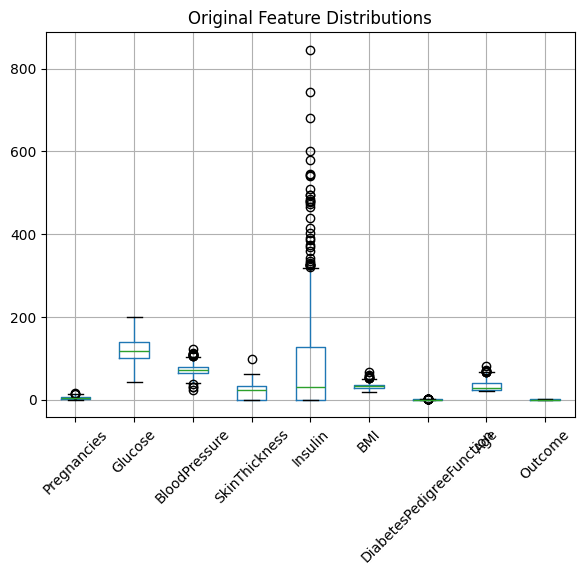

In [37]:
#Problem 2
# Handle zero values as we did in Problem 1
features_to_fix = ['Glucose', 'BloodPressure', 'BMI']
for feature in features_to_fix:
    median_value = diabetes_data[diabetes_data[feature] != 0][feature].median()
    diabetes_data[feature] = diabetes_data[feature].replace(0, median_value)

# Let's first visualize our original feature distributions
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
diabetes_data.boxplot()
plt.title('Original Feature Distributions')
plt.xticks(rotation=45)

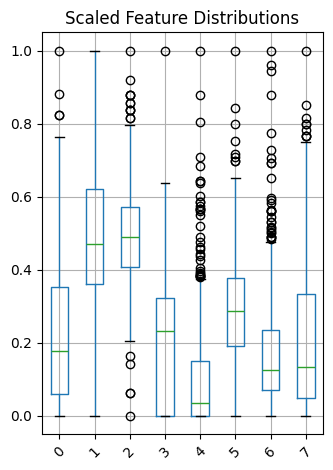


Feature Ranges Before and After Scaling:
Pregnancies     - Original: [0.00, 17.00]        Scaled: [0.00, 1.00]
Glucose         - Original: [44.00, 199.00]      Scaled: [0.00, 1.00]
BloodPressure   - Original: [24.00, 122.00]      Scaled: [0.00, 1.00]
SkinThickness   - Original: [0.00, 99.00]        Scaled: [0.00, 1.00]
Insulin         - Original: [0.00, 846.00]       Scaled: [0.00, 1.00]
BMI             - Original: [18.20, 67.10]       Scaled: [0.00, 1.00]
DiabetesPedigreeFunction - Original: [0.08, 2.42]         Scaled: [0.00, 1.00]
Age             - Original: [21.00, 81.00]       Scaled: [0.00, 1.00]

Evaluating KNN on Original vs Scaled Data:

Comparative Analysis:
Original Data - Accuracy: 72.29%, Time: 1.0452s
Scaled Data  - Accuracy: 73.59%, Time: 1.3860s


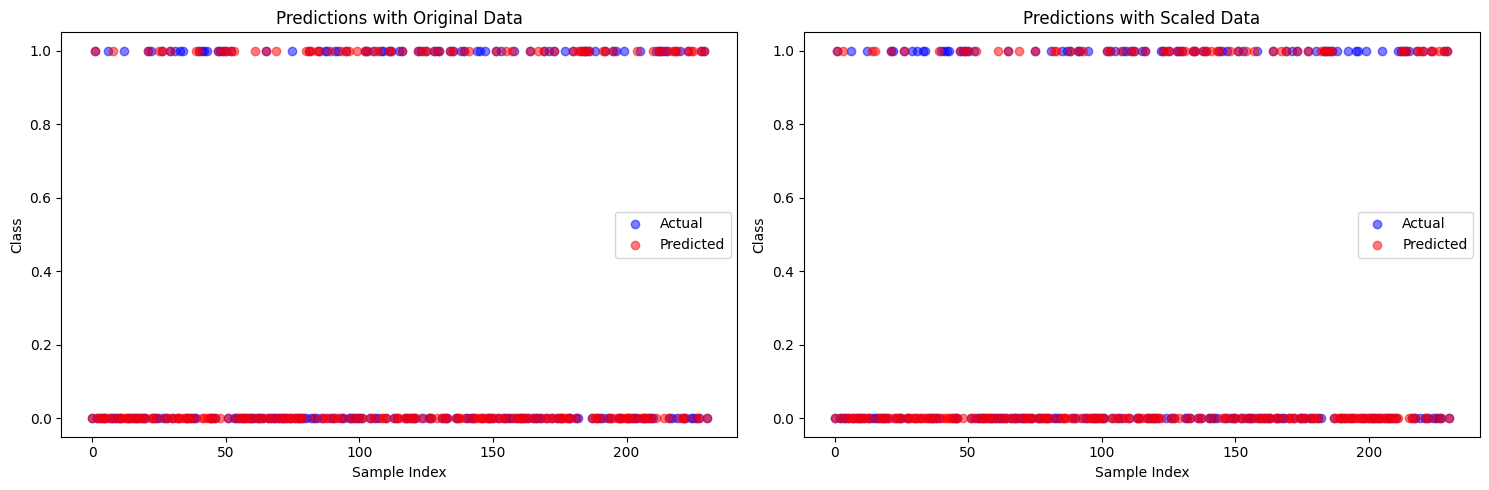

In [38]:
import time
# Implementing feature scaling function
def scale_features(X):
    """
    Scales features using min-max normalization to range [0,1].

    The formula used is: X_scaled = (X - X_min) / (X_max - X_min)

    This scaling ensures all features contribute equally to distance calculations
    in KNN, preventing features with larger ranges from dominating the model.
    """
    X_min = X.min(axis=0)
    X_max = X.max(axis=0)
    X_scaled = (X - X_min) / (X_max - X_min)
    return X_scaled, X_min, X_max

# Separate features and target
X = diabetes_data.drop('Outcome', axis=1).values
y = diabetes_data['Outcome'].values

# Scale our features
X_scaled, X_min, X_max = scale_features(X)

# Visualize the scaled feature distributions
plt.subplot(1, 2, 2)
pd.DataFrame(X_scaled).boxplot()
plt.title('Scaled Feature Distributions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Let's examine the impact of scaling on feature ranges
print("\nFeature Ranges Before and After Scaling:")
for i, feature in enumerate(diabetes_data.drop('Outcome', axis=1).columns):
    original_range = f"[{X[:, i].min():.2f}, {X[:, i].max():.2f}]"
    scaled_range = f"[{X_scaled[:, i].min():.2f}, {X_scaled[:, i].max():.2f}]"
    print(f"{feature:15} - Original: {original_range:20} Scaled: {scaled_range}")

# Reusing our functions from Problem 1 with slight modifications for timing
def custom_train_test_split(X, y, train_ratio=0.7, random_seed=42):
    """Creates train-test split while maintaining corresponding indices."""
    np.random.seed(random_seed)
    indices = np.random.permutation(len(X))
    split_point = int(len(X) * train_ratio)
    train_indices = indices[:split_point]
    test_indices = indices[split_point:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

def calculate_euclidean_distance(point1, point2):
    """Calculates Euclidean distance between two points."""
    return np.sqrt(np.sum((point1 - point2) ** 2))

def predict_single_sample(query_point, X_train, y_train, k):
    """Predicts class for a single sample using KNN."""
    distances = [calculate_euclidean_distance(query_point, x) for x in X_train]
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = y_train[k_indices]
    return np.bincount(k_nearest_labels).argmax()

def knn_predict(X_test, X_train, y_train, k):
    """Predicts classes for multiple test samples."""
    return np.array([predict_single_sample(x, X_train, y_train, k) for x in X_test])

def calculate_accuracy(y_true, y_predicted):
    """Calculates prediction accuracy."""
    return (np.sum(y_true == y_predicted) / len(y_true)) * 100

# Function to run KNN and record performance metrics
def evaluate_knn(X_train, X_test, y_train, y_test, k):
    """
    Evaluates KNN performance and returns accuracy and timing information.
    This helps us compare the performance between scaled and unscaled data.
    """
    start_time = time.time()
    predictions = knn_predict(X_test, X_train, y_train, k)
    end_time = time.time()

    accuracy = calculate_accuracy(y_test, predictions)
    computation_time = end_time - start_time

    return accuracy, computation_time, predictions

# Create train-test splits for both original and scaled data
X_train, X_test, y_train, y_test = custom_train_test_split(X, y)
X_train_scaled, X_test_scaled, _, _ = custom_train_test_split(X_scaled, y)

# Evaluate KNN on both original and scaled data
k = 3  # Using the same k as in Problem 1
print("\nEvaluating KNN on Original vs Scaled Data:")

# Original data evaluation
accuracy_original, time_original, pred_original = evaluate_knn(
    X_train, X_test, y_train, y_test, k)

# Scaled data evaluation
accuracy_scaled, time_scaled, pred_scaled = evaluate_knn(
    X_train_scaled, X_test_scaled, y_train, y_test, k)

# Display comparative results
print("\nComparative Analysis:")
print(f"Original Data - Accuracy: {accuracy_original:.2f}%, Time: {time_original:.4f}s")
print(f"Scaled Data  - Accuracy: {accuracy_scaled:.2f}%, Time: {time_scaled:.4f}s")

# Visualize prediction comparisons
plt.figure(figsize=(15, 5))

# Plot original data predictions
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(range(len(pred_original)), pred_original, color='red',
           label='Predicted', alpha=0.5)
plt.title('Predictions with Original Data')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.legend()

# Plot scaled data predictions
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(range(len(pred_scaled)), pred_scaled, color='red',
           label='Predicted', alpha=0.5)
plt.title('Predictions with Scaled Data')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.legend()

plt.tight_layout()
plt.show()


Accuracy for k=1: 65.80%
Accuracy for k=2: 71.43%
Accuracy for k=3: 72.29%
Accuracy for k=4: 76.19%
Accuracy for k=5: 71.43%
Accuracy for k=6: 75.32%
Accuracy for k=7: 73.59%
Accuracy for k=8: 75.32%
Accuracy for k=9: 73.16%
Accuracy for k=10: 74.03%
Accuracy for k=11: 72.73%
Accuracy for k=12: 72.73%
Accuracy for k=13: 74.03%
Accuracy for k=14: 75.32%
Accuracy for k=15: 75.32%
Accuracy for k=16: 75.76%
Accuracy for k=17: 73.59%
Accuracy for k=18: 75.76%
Accuracy for k=19: 74.89%
Accuracy for k=20: 74.89%


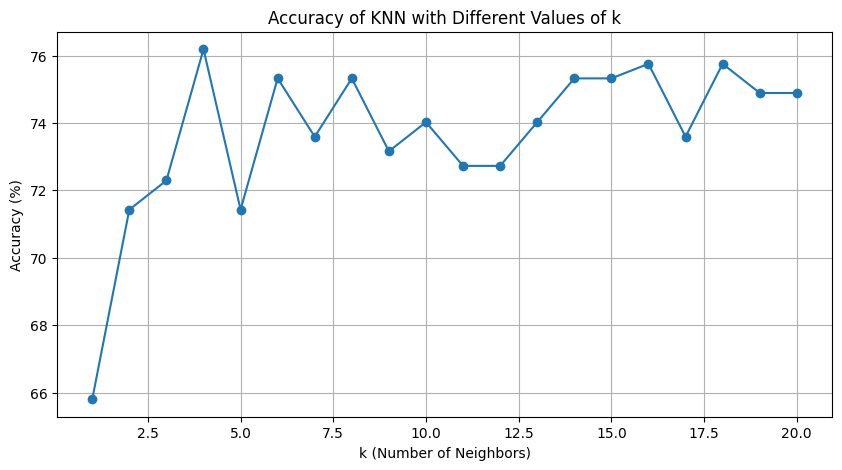

Experiment completed. Check the plot for the accuracy trend.


In [40]:
#Problem 3
import matplotlib.pyplot as plt
def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values):
    """
    Run KNN predictions for different values of k and plot the accuracies.

    Arguments:
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    X_test : np.ndarray
        The test feature matrix.
    y_test : np.ndarray
        The test labels.
    k_values : list of int
        A list of k values to experiment with.

    Returns:
    dict
        A dictionary with k values as keys and their corresponding accuracies as values.
    """
    accuracies = {}

    for k in k_values:

        #predictions = complete code
        predictions = knn_predict(X_test, X_train, y_train, k=k)


        accuracy = calculate_accuracy(y_test, predictions)
        accuracies[k] = accuracy

        print(f"Accuracy for k={k}: {accuracy:.2f}%")


    plt.figure(figsize=(10, 5))
    plt.plot(k_values, list(accuracies.values()), marker='o')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy of KNN with Different Values of k')
    plt.grid(True)
    plt.show()

    return accuracies


k_values = range(1, 21)


try:
    accuracies = experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values)
    print("Experiment completed. Check the plot for the accuracy trend.")
except Exception as e:
    print(f"An unexpected error occurred during the experiment: {e}")
